Importing needed Packages

In [580]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go

Creating dataframes for each sheet by reading the excel file -'V02Max_Combined'

In [618]:
file_path='Hackathon_Aug24/V02Max_Combined.xlsx'
Kayaking=pd.read_excel(file_path,sheet_name='Kayaking')
Athletes=pd.read_excel(file_path,sheet_name='Athletes')
Triathlon=pd.read_excel(file_path,sheet_name='Triathlon')
Fencing=pd.read_excel(file_path,sheet_name='Fencing')


C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\Sailu\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [18]:
print(Kayaking)

       ID      time     RR       VO2  power
0      11  -168.600  727.0  0.287147      0
1      11  -167.872  728.0  0.287147      0
2      11  -167.148  724.0  0.287147      0
3      11  -166.484  664.0  0.320580      0
4      11  -165.836  648.0  0.320580      0
...    ..       ...    ...       ...    ...
19473  16  1118.404  548.0  0.671957      0
19474  16  1118.944  540.0  0.671957      0
19475  16  1119.484  540.0  0.671957      0
19476  16  1120.016  532.0  0.671957      0
19477  16  1120.544  528.0  0.671957      0

[19478 rows x 5 columns]


Creating a column called 'Sport' into the dataframes

Concatenating all the dataframes (all the sheets into one)

In [1080]:
combined=pd.concat([Kayaking,Triathlon,Fencing])

In [39]:
combined.head()

,ID,time,RR,VO2,power,sport
0,11,-168.600,727.0,0.287147,0,Kayaking
1,11,-167.872,728.0,0.287147,0,Kayaking
2,11,-167.148,724.0,0.287147,0,Kayaking
3,11,-166.484,664.0,0.320580,0,Kayaking
4,11,-165.836,648.0,0.320580,0,Kayaking


In [622]:
combined.tail()

,ID,time,RR,VO2,power
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0
27602,10,944.404,428.0,0.786363,0


### Q17 ) What is the maximum ventilatory threshold for triathletes.

In [624]:
#Athletes.describe()
Triathletes=Athletes[(Athletes['sport']=='triathlon')]
Triathletes


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
16,17,12,39.9,156,101,145,triathlon,Male,Latino,Lucas,Foster
17,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers


In [632]:
Max_Ventilatory_threshold=Triathletes[['P_vt1','P_vt2']].describe()
Max_Ventilatory_threshold.loc['max']

P_vt1    101.0
P_vt2    168.0
Name: max, dtype: float64

In [640]:
#For individual IDs
#df1=Triathletes.groupby('ID')['P_vt1'].max() 
#df2=Triathletes.groupby('ID')['P_vt2'].max()

Q18)Display the number of athletes in every sport against the name of the sport.

In [642]:
Athletes['sport'].value_counts()

sport
fencing      10
kayak         6
triathlon     2
Name: count, dtype: int64

### Q22)Using any 10 HR values print even if the value is an even number and odd if its an odd number

In [840]:
combined['HR']=round(60000/combined['RR'])
HR_random=combined['HR']
HR_random=HR_random.drop_duplicates()
HR_random=HR_random.head(10)
for i in HR_random:
    if i%2==0:
        print(i," - even ")
    else:
        print(i," - odd ")


83.0  - odd 
82.0  - even 
90.0  - even 
93.0  - odd 
97.0  - odd 
86.0  - even 
75.0  - odd 
76.0  - even 
78.0  - even 
77.0  - odd 


### Q24)Store athlete name and sport in a dictionary as a pair of values.

In [666]:
fname=Athletes['First Name']
lname=Athletes['Last Name']
full_name=fname+' '+lname
Name_sport_dict=Athletes.set_index(full_name)['sport'].to_dict()
Name_sport_dict

{'Olivia Martinez': 'fencing',
 'Ethan Reynolds': 'fencing',
 'Jackson Harper': 'fencing',
 'Liam Sanchez': 'fencing',
 'Ava Thompson': 'fencing',
 'Sophia Rodriguez': 'fencing',
 'Grace Simmons': 'fencing',
 'Aiden Bennett': 'fencing',
 'Chloe Price': 'fencing',
 'Lily Jordan': 'fencing',
 'Isabella Griffin': 'kayak',
 'Caleb Dixon': 'kayak',
 'Mia Carpenter': 'kayak',
 'Harper Mitchell': 'kayak',
 'Mason Wallace': 'kayak',
 'Logan Anderson': 'kayak',
 'Lucas Foster': 'triathlon',
 'Owen Myers': 'triathlon'}

### Q25) Using arrays and loops, find the count of athletes based on gender.

In [670]:
athletes_male=[]
athletes_female=[]

for fname,gender in zip(Athletes['First Name'],Athletes['Gender']):
    if gender == 'Male':
        athletes_male.append(fname)      
    else:
        athletes_female.append(fname)
        
print('Male: ',len(athletes_male))
print('Female: ',len(athletes_female))



Male:  8
Female:  10


### Q31)Return the count of athletes for any sport that the user inputs.

In [676]:
sport_in=input("Enter any sport from the following - fencing/triathlon/kayak")
df=dict(Athletes['sport'].value_counts())
for i in df:
        if i ==sport_in:
            print(df[sport_in])
        else:
            continue

Enter any sport from the following - fencing/triathlon/kayak triathlon


2


### Q28) Print athlete 15s Age and Pvt1 using the format() function

In [927]:
df=Athletes[(Athletes['ID'] == 15)]
df_dict=df.to_dict('list')

athlete_details="Athlete ID is {ID}, His age is {age} and his P_vt1 is {pvt1}".format(ID=df_dict['ID'],age=df_dict['age'],pvt1=df_dict['P_vt1'])
print(athlete_details)


Athlete ID is [15], His age is [13] and his P_vt1 is [125]


### Q32)Insert the name of every athlete into an array and display the length of that array.

In [696]:
arr=[]
fname=Athletes['First Name']
lname=Athletes['Last Name']
full_name=fname+' '+lname

for i in full_name:
    arr.append(i)
print(len(arr))


18


### Q21) Display a pie chart of number of athletes by sport.

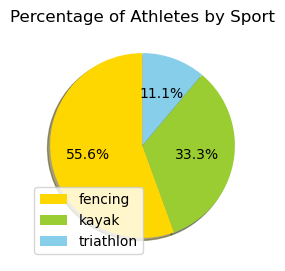

In [831]:
df=dict(Athletes['sport'].value_counts())

sport=[]
No_of_athletes=[]

for key in df.keys():
    sport.append(key)
    No_of_athletes.append(df[key])


colors = ['gold', 'yellowgreen','skyblue']

plt.figure(figsize=(len(sport),len(No_of_athletes)) ) # if we don't use it, default size of the figure will be shown.
plt.title( 'Percentage of Athletes by Sport')

plt.pie(No_of_athletes,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90, center = (-2,0))

plt.legend(labels = sport)
#plt.axis('equal')
plt.show()

##### 

### Q19) Display a bar chart showing the average V02 Max by sport.

<BarContainer object of 3 artists>

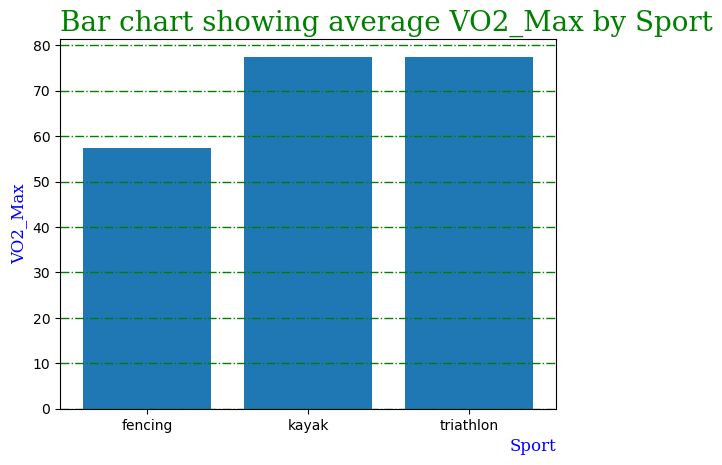

In [925]:
#for calculating the average VO2
sum_vo2=merged.groupby(['sport','ID'])['VO2'].sum()
#print(sum_vo2)
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]
#print(df1)
for index,row in df1.iterrows():
      df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
      df2=df1.groupby('sport')['max_vo2'].mean()
#print(df2)

sport=[]
avg_vo2_max=[]

for key in df2.keys():
    sport.append(key)
    avg_vo2_max.append(df2[key])
    
#print(sport)
#print(avg_vo2_max)

font1 = {'family':'serif', 'color':'green', 'size':20}
font2 = { 'family':'serif', 'color':'blue', 'size':12}

plt.xlabel("Sport", fontdict = font2, loc = "right")
plt.ylabel("VO2_Max", fontdict = font2, loc='center') # top, center, bottom
plt.title("Bar chart showing average VO2_Max by Sport", fontdict = font1, loc = 'left')

plt. grid(axis = 'y',color ='g', linestyle = 'dashdot', linewidth=1) # dashed, solid, dottedd, dashdot, '-' ':', 'None', " ", '','-.'
plt.bar(sport,avg_vo2_max)


### Q20) Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 

In [739]:
combined.describe()

,ID,time,RR,VO2,power,HR
count,52062.000000,52062.00000,50914.000000,52062.000000,52062.000000,50914.000000
mean,9.518766,547.45914,443.583808,1.539104,106.528754,143.914876
std,5.043902,386.29623,212.585991,0.799706,88.603627,30.762980
min,1.000000,-219.87200,252.000000,0.069354,0.000000,2.000000
25%,5.000000,244.29500,352.000000,0.972290,0.000000,124.000000
50%,10.000000,542.03800,412.000000,1.419143,95.000000,146.000000
75%,14.000000,822.13900,484.000000,2.043474,170.000000,170.000000
max,18.000000,1504.05600,30500.000000,4.576774,335.000000,238.000000


### Q27)Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.

In [1047]:
combined['Avg_HR']=combined.groupby(['ID'])['HR'].mean()
combined

,ID,time,RR,VO2,power,HR,Avg_HR,stage,vo2_max,HR_Zone
0,11,-168.600,727.0,0.287147,0,82.53,NaN,Warm up,NaN,Zone 1 (recovery/easy)
1,11,-167.872,728.0,0.287147,0,82.42,155.069988,Warm up,1.789775,Zone 1 (recovery/easy)
2,11,-167.148,724.0,0.287147,0,82.87,139.276885,Warm up,1.959791,Zone 1 (recovery/easy)
3,11,-166.484,664.0,0.320580,0,90.36,136.646738,Warm up,3.455253,Zone 1 (recovery/easy)
4,11,-165.836,648.0,0.320580,0,92.59,149.006684,Warm up,3.437170,Zone 1 (recovery/easy)
...,...,...,...,...,...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0,140.19,NaN,Cool down,NaN,Zone 4 (Lactate threshold)
27599,10,943.124,424.0,0.786363,0,141.51,NaN,Cool down,NaN,Zone 4 (Lactate threshold)
27600,10,943.552,428.0,0.786363,0,140.19,NaN,Cool down,NaN,Zone 4 (Lactate threshold)
27601,10,943.976,424.0,0.786363,0,141.51,NaN,Cool down,NaN,Zone 4 (Lactate threshold)


### Q30) Display the HRV of each athlete?

In [859]:
HRV_athlete=combined.groupby(['ID'])['RR'].std()
print(HRV_athlete)

ID
1     121.157152
2     180.730679
3     115.570278
4      96.588612
5     140.756819
6     347.787239
7     121.684478
8     387.432612
9     115.715009
10    133.765589
11     99.785372
12    110.027812
13    100.119653
14    172.115157
15    137.059986
16    575.089786
17    130.962202
18    143.344855
Name: RR, dtype: float64


In [861]:
conditions=[
    (combined['time']<0),
    (combined['time']>0) & (combined['power']>0),
    (combined['power']<=0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')
print(combined)   

       ID     time     RR       VO2  power     HR      Avg_HR      stage
0      11 -168.600  727.0  0.287147      0   83.0         NaN    Warm up
1      11 -167.872  728.0  0.287147      0   82.0  155.113608    Warm up
2      11 -167.148  724.0  0.287147      0   83.0  139.278000    Warm up
3      11 -166.484  664.0  0.320580      0   90.0  136.631136    Warm up
4      11 -165.836  648.0  0.320580      0   93.0  149.045479    Warm up
...    ..      ...    ...       ...    ...    ...         ...        ...
27598  10  942.700  428.0  0.786363      0  140.0         NaN  Cool down
27599  10  943.124  424.0  0.786363      0  142.0         NaN  Cool down
27600  10  943.552  428.0  0.786363      0  140.0         NaN  Cool down
27601  10  943.976  424.0  0.786363      0  142.0         NaN  Cool down
27602  10  944.404  428.0  0.786363      0  140.0         NaN  Cool down

[52062 rows x 8 columns]


<BarContainer object of 3 artists>

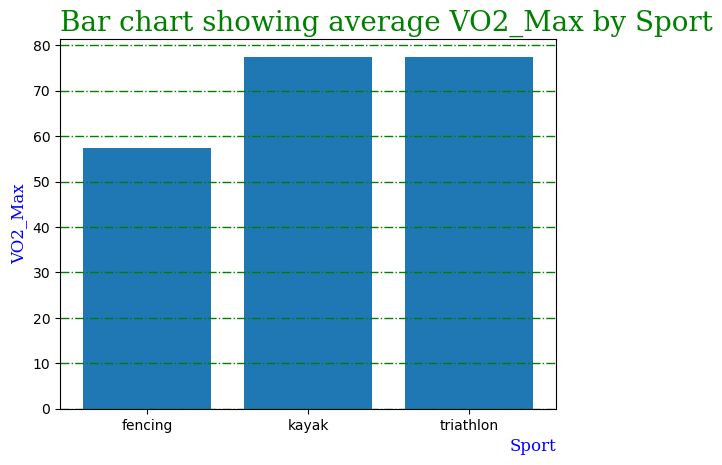

In [923]:
#for calculating the average VO2
sum_vo2=merged.groupby(['sport','ID'])['VO2'].sum()
#print(sum_vo2)
df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]
#print(df1)
for index,row in df1.iterrows():
      df1.at[index,'max_vo2']=round(df1.at[index,'VO2']/df1.at[index,'Weight'],2)
      df2=df1.groupby('sport')['max_vo2'].mean()
#print(df2)

sport=[]
avg_vo2_max=[]

for key in df2.keys():
    sport.append(key)
    avg_vo2_max.append(df2[key])
    
#print(sport)
#print(avg_vo2_max)

font1 = {'family':'serif', 'color':'green', 'size':20}
font2 = { 'family':'serif', 'color':'blue', 'size':12}

plt.xlabel("Sport", fontdict = font2, loc = "right")
plt.ylabel("VO2_Max", fontdict = font2, loc='center') # top, center, bottom
plt.title("Bar chart showing average VO2_Max by Sport", fontdict = font1, loc = 'left')

plt. grid(axis = 'y',color ='g', linestyle = 'dashdot', linewidth=1) # dashed, solid, dottedd, dashdot, '-' ':', 'None', " ", '','-.'
plt.bar(sport,avg_vo2_max)


### Q29) On average how long was each participants’ warm up?

In [1038]:
def Heart_Rate(rr):
    return round(60*1000/rr,2)
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
combined['HR']=combined['RR'].apply(Heart_Rate)
combined['HR_Zone']=combined['HR'].apply(Heartrate_Zone)
#pd.set_option('display.max_rows',1000)
#print(combined)
 
conditions=[
    (combined['time']<0),
    (combined['time']>=0) & (combined['power']>0),
    (combined['time']>0) & (combined['power']<=0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')
#print(combined)

Stage_ID_HR_counts=combined.groupby(['ID','HR_Zone'])['stage'].value_counts()
#print(Stage_ID_HR_counts.head(25))

Stage_df=combined[(combined['stage'] == 'Warm up')]
#print(Stage_df)

ID_wrt_time=Stage_df.groupby(['ID'])['time'].min()
ID_wrt_time.to_dict()

for key in ID_wrt_time.keys():
    ID_wrt_time[key]=round(abs(ID_wrt_time[key])/60,2)

# For adding label to time in minutes - used below formatting technique
print("{:<8} {:<15} ".format('ID','Time in Minutes'))
for k, v in ID_wrt_time.items():
    label = v
    print("{:<8} {:<15} ".format(k, label))


ID       Time in Minutes 
1        2.18            
2        3.66            
3        3.04            
4        3.06            
5        3.01            
6        3.07            
7        3.04            
8        3.04            
9        3.6             
10       3.04            
11       2.81            
12       3.05            
13       3.07            
14       2.68            
15       3.08            
16       2.75            
17       3.04            
18       3.02            


### Q27) Create a sankey diagram to show the groups of race within each sport

In [1156]:
#Stage_ID_HR_counts=combined.groupby(['ID','HR_Zone'])['stage'].value_counts()
df=Athletes.groupby(['sport'])['Ethnicity'].value_counts()
#print(df)
dict=df.to_dict()
#print(dict)
list1=[]
cnt=[]
sport=[]
race=[]

for key in dict:
    list1.append(list(key))
print(list1)
for key in dict:
    cnt.append(dict[key])
print(cnt)

for i in range(0,2):
    for j in range(0,2):
        



[['fencing', 'White'], ['fencing', 'African'], ['kayak', 'African'], ['kayak', 'Asian'], ['kayak', 'Latino'], ['triathlon', 'Latino']]
[6, 4, 2, 2, 2, 2]
